In [165]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import control.matlab as matlab

dados de simulacao

\dot{x}(t) = -2x(t)+bu(t)

x = (b/(s+2))u

In [166]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%
# Dados de simulação
b = 3
num = [b]
den = [1, 2]  # Ajuste o sinal do coeficiente '2' para '-2' para representar o sistema correto
N = 3  # Número de amostras
dt = 0.01
T = np.arange(0, N + dt, dt)
u = np.ones(int(N/dt + 1))

C:\Users\felip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\control\timeresp.py:940: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


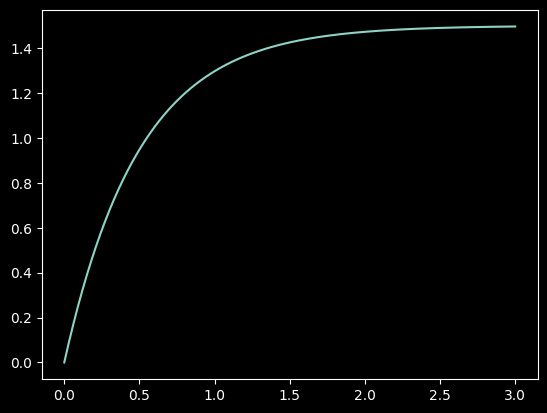

In [167]:
# fourier transform
ftx = matlab.tf(num, den)

#  calcular a resposta do sistema e Y conterá a saída, T conterá o vetor de tempo correspondente 
# e _ (underscore) é usado para descartar a terceira saída que não é usada nesse caso
Y, T, _ = matlab.lsim(ftx, u, T)
plt.plot(T, Y, label='y(t)')

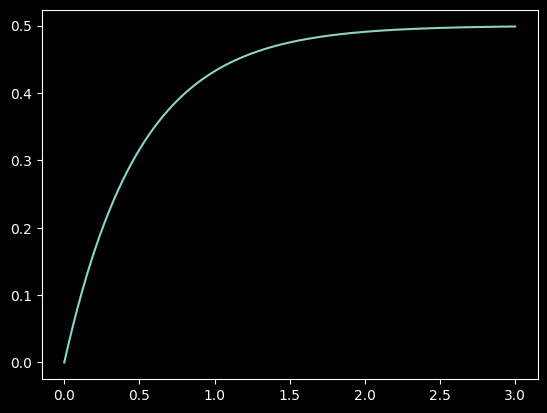

In [168]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%
# Algoritmo de identificação de parâmetros
teta = [0]*301
erro = [0]*301
ftx1 = matlab.tf(1, den)
phi, T, _ = matlab.lsim(ftx1, u, T)

plt.plot(T, phi, label='phi(t)')

gama = 1000
ms = 10

In [169]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%
# de k = 1 até N de dt em dt
for k in range(0, int(N/dt)):
    teta[k+1] = (teta[k] + gama * dt * ((Y[k] - teta[k] * phi[k]) / ms) * phi[k])
    erro[k+1] = (Y[k] - teta[k] * phi[k])


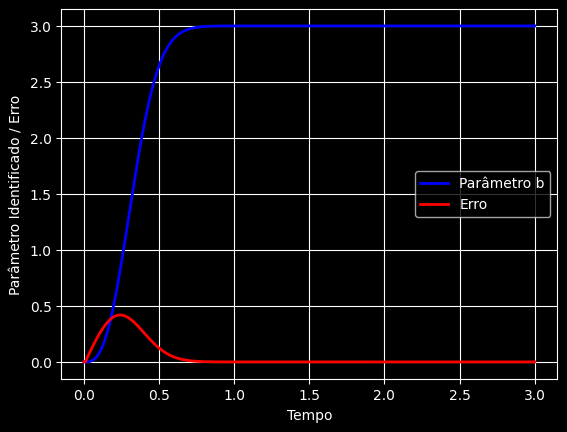

In [170]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%
# Gráfico dos parâmetros identificados e do erro

plt.plot(T, teta, 'b', linewidth=2, label='Parâmetro b')
plt.plot(T, erro, 'r', linewidth=2, label='Erro')
plt.legend()
plt.xlabel('Tempo')
plt.ylabel('Parâmetro Identificado / Erro')
plt.grid(True)
plt.show()
